Report was successfully generated and saved to data_cleaning_report.txt


<Figure size 1000x600 with 0 Axes>

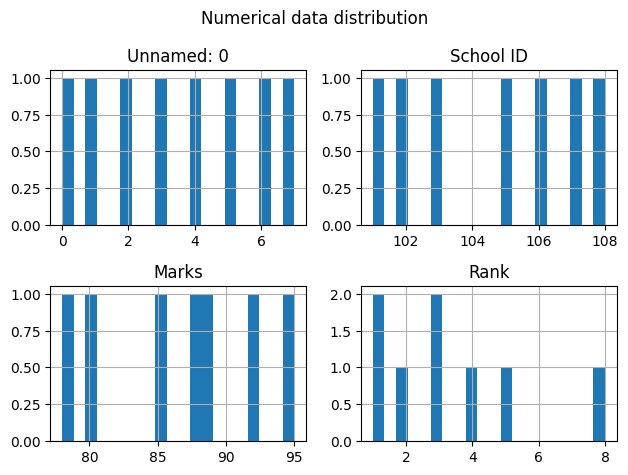

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

def generate_summary_report(input_file, output_file):
   
    current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
   
    report =f"""
    Data Cleaning and Visualization Summary Report
    ------------------------------------------
    Generation Date and Time: {current_time}
    Input File: {os.path.basename(input_file)}
    File Size: {os.path.getsize(input_file)/1024:.2f} KB
    File Location: {os.path.abspath(input_file)}
    ------------------------------------------
    """
    
    try:
        df = pd.read_csv(input_file)
        
        report += "\nData Cleaning Summary:\n"
        report += f"- Total Rows: {len(df)}\n"
        report += f"- Total Columns: {len(df.columns)}\n"
        
       
        missing_data = df.isnull().sum()
        report += "\nMissing Data Analysis:\n"
        for col, count in missing_data.items():
            report += f"- {col}: {count} missing values ​​({count/len(df)*100:.1f}%)\n"
        
        report += "\nData types:\n"
        for col, dtype in df.dtypes.items():
            report += f"- {col}: {dtype}\n"
        
        report += "\nBasic statistics:\n"
        report += df.describe().to_string()
     
        plt.figure(figsize=(10, 6))
        
        
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
        if len(numeric_cols) > 0:
            df[numeric_cols].hist(bins=20)
            plt.suptitle('Numerical data distribution')
            plt.tight_layout()
            plot_file = os.path.join(os.path.dirname(output_file), 'data_distribution.png')
            plt.savefig(plot_file)
            report += f"\n\nVisualization: Histogram plot saved to {plot_file}"
        
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(report)
            
        print(f"Report was successfully generated and saved to {output_file}")
        
    except Exception as e:
        report += f"\n Error:{str(e)}"
        with open(output_file, 'w', encoding='utf-8') as f:
            f.write(report)
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    input_csv = "Sample DataFrame with missing values.csv"  
    output_report = "data_cleaning_report.txt" 
    
    generate_summary_report(input_csv, output_report)